In [33]:
#Kevin Madden 
#Due Date: 2/14/2022
#Professor: Dr. Hamed Tabkhi, PH.D.

import torch
from PIL import Image
from torchvision import transforms
import requests
from io import BytesIO
import numpy as np
import torch.optim as optim

#checking if I have GPU connected
torch.cuda.is_available()

True

In [20]:
#farenheit to celsius data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [21]:
#2.a
def model(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [22]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [36]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [37]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)

loss.backward()
optimizer.step()

params

tensor([-2.6181e+00, -2.3049e+02, -5.9642e-02], requires_grad=True)

In [86]:
t_un = 0.05 * t_u

In [87]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()

loss.backward()
optimizer.step()

params

tensor([1.0885, 1.3882, 0.0112], requires_grad=True)

In [88]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c)
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
      print('Epoch %d, Loss %f' % (epoch, float(loss)))
  
  return params

In [110]:
#2.b
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
learning_rate = .00001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
  n_epochs = 5000,
  optimizer = optimizer,
  params = params,
  t_u = t_un,
  t_c = t_c)

Epoch 500, Loss 12.180255
Epoch 1000, Loss 11.284072
Epoch 1500, Loss 11.030828
Epoch 2000, Loss 10.909861
Epoch 2500, Loss 10.816719
Epoch 3000, Loss 10.730027
Epoch 3500, Loss 10.645405
Epoch 4000, Loss 10.561942
Epoch 4500, Loss 10.479460
Epoch 5000, Loss 10.397906


tensor([ 0.9306,  1.2964, -0.1119], requires_grad=True)

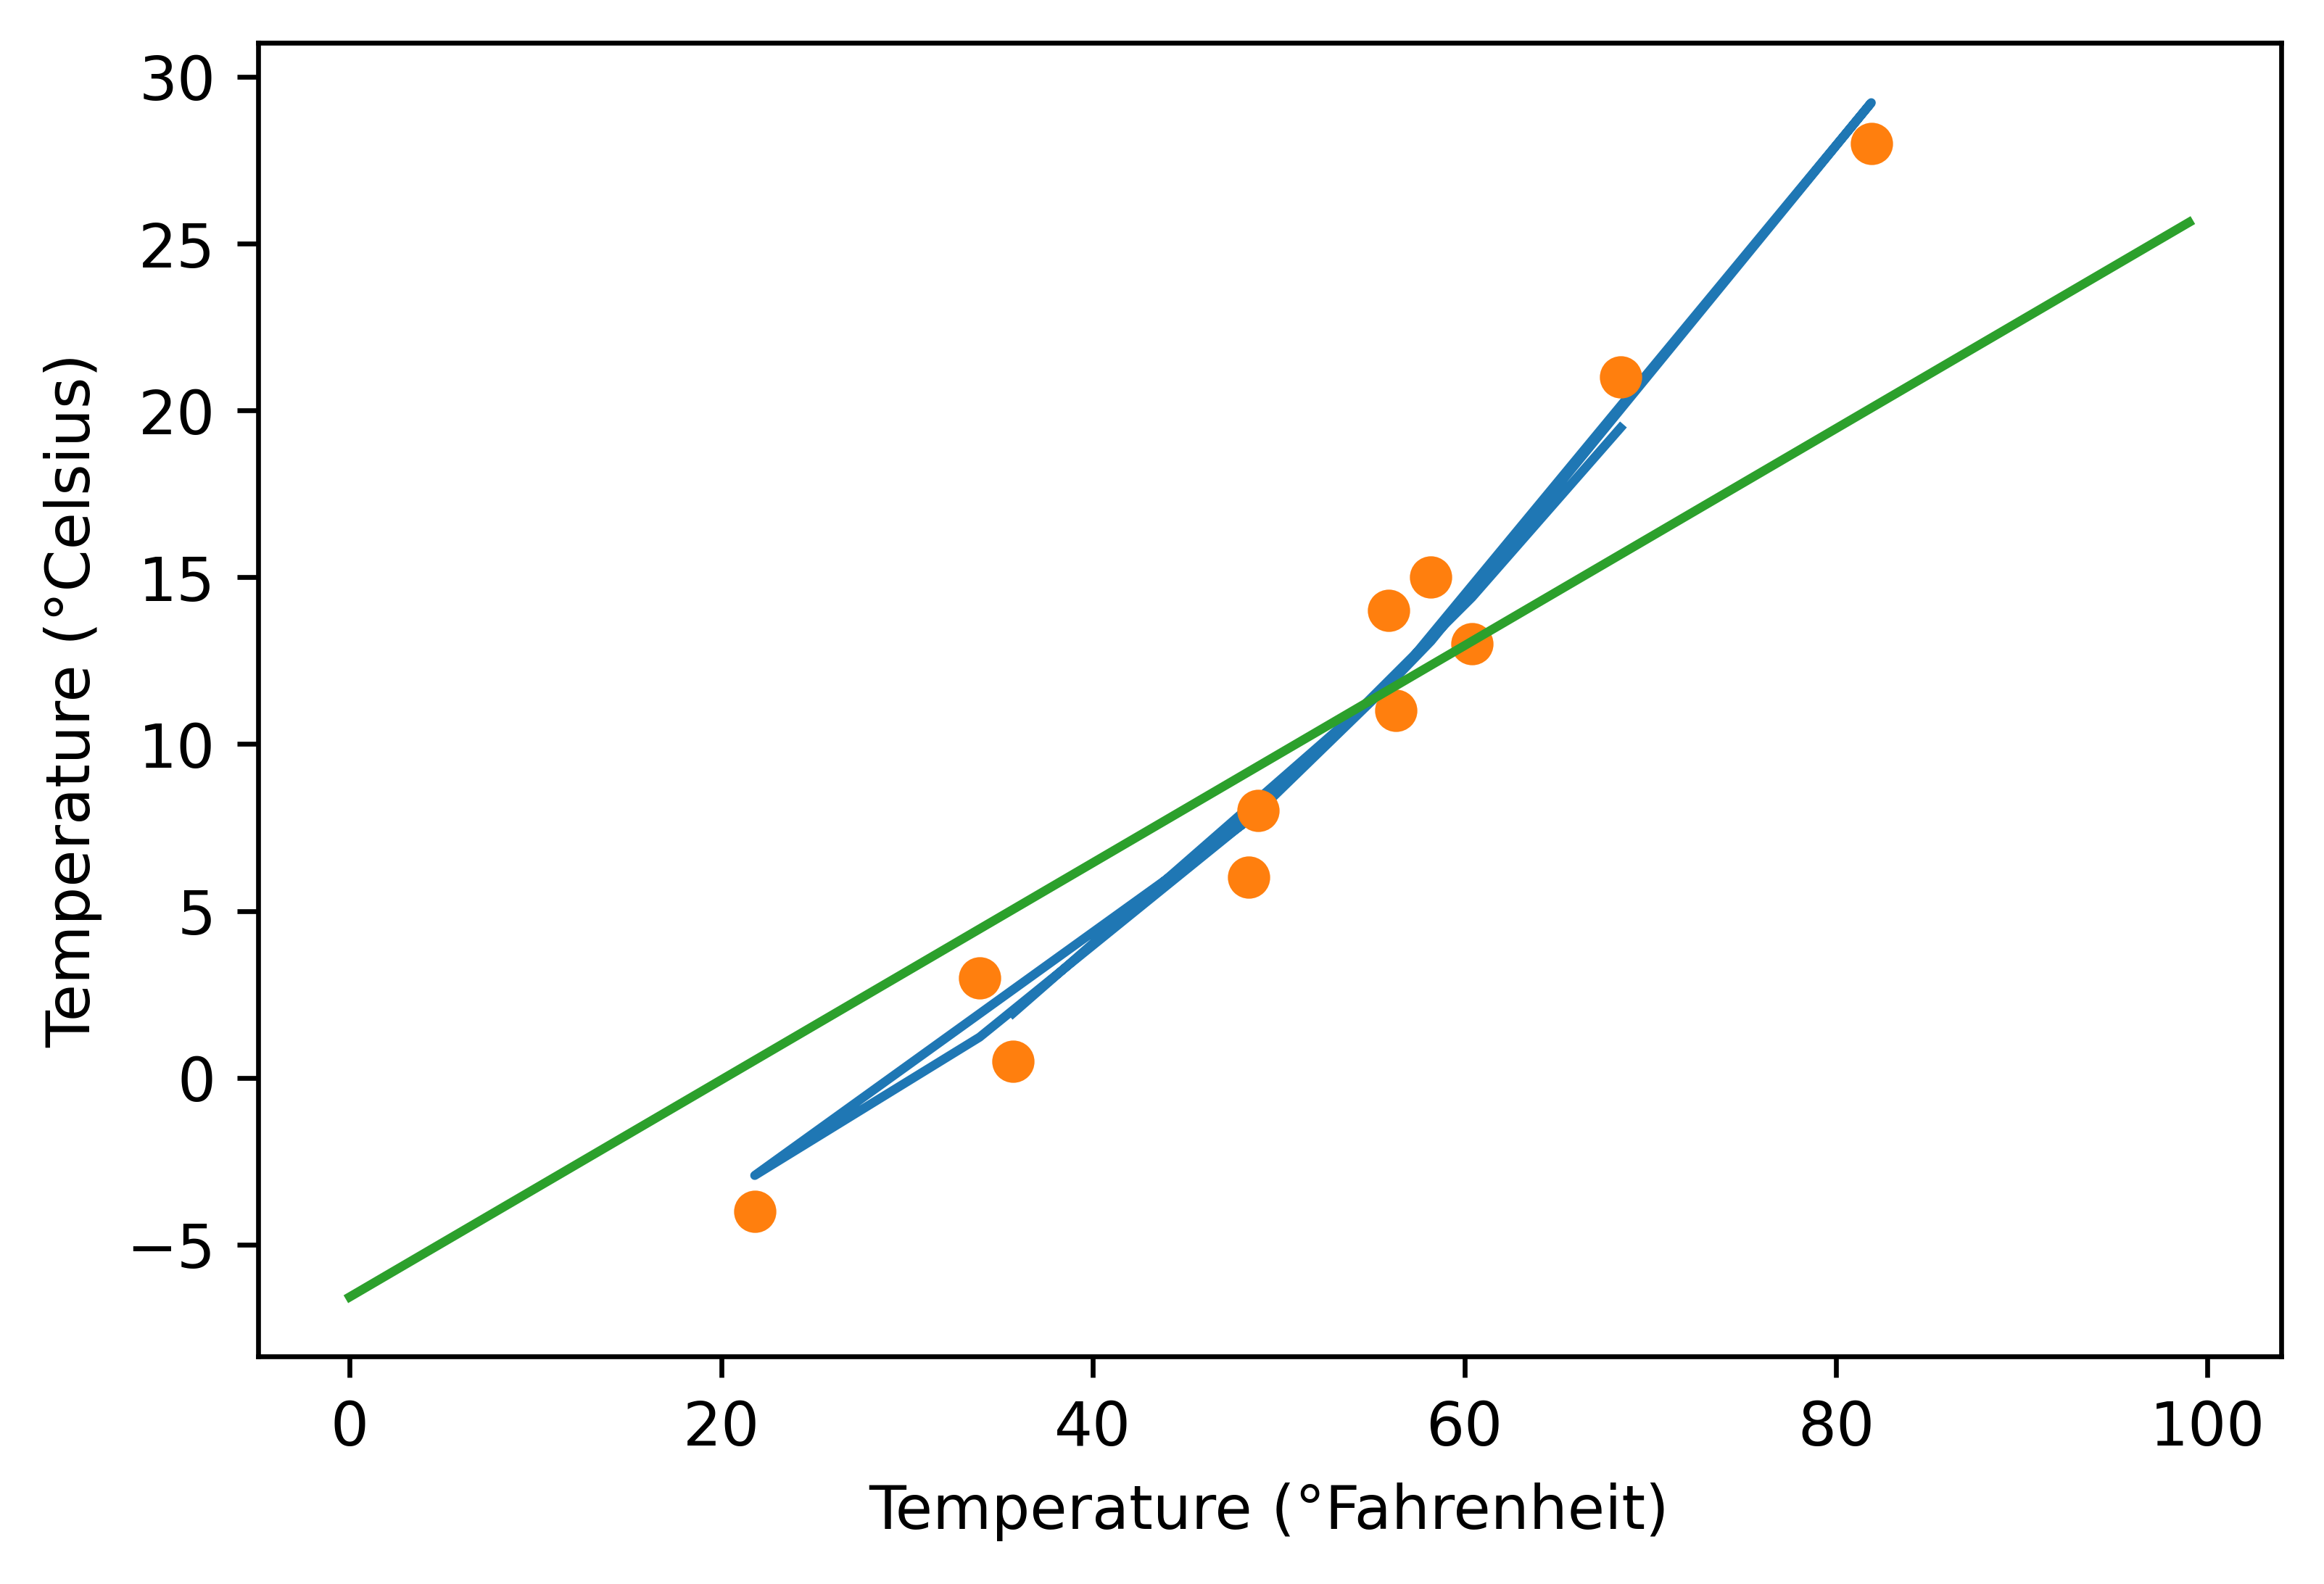

In [105]:
from re import X
%matplotlib inline
from matplotlib import pyplot as plt
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
x = np.linspace(20,80,100)
linPlot = 0.5367*x - 17.3021  #taken from the textbook
plt.plot(linPlot)